dataset-https://www.kaggle.com/datasets/altavish/boston-housing-dataset

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
df=pd.read_csv("1_boston_housing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
MEDV       0
dtype: int64

In [4]:
df.mean()

crim         3.613524
zn          11.363636
indus       11.136779
chas         0.069170
nox          0.554695
rm           6.284634
age         68.574901
dis          3.795043
rad          9.549407
tax        408.237154
ptratio     18.455534
b          356.674032
lstat       12.653063
MEDV        22.532806
dtype: float64

In [5]:
df.fillna(df.mean(),inplace=True)

In [6]:
x = df.drop('MEDV',axis=1)
y=df['MEDV']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
scale = MinMaxScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.fit_transform(x_test)
print("shape of scaled x train:",x_train_scaled.shape)
print("shape of scaled x test:",x_test_scaled.shape)

shape of scaled x train: (354, 13)
shape of scaled x test: (152, 13)


In [8]:
x_train_scaled[0]

array([0.02513255, 0.        , 0.70087977, 0.        , 0.4526749 ,
       0.4393562 , 0.91555098, 0.13422749, 0.17391304, 0.41108987,
       0.22340426, 0.99548641, 0.26962552])

In [9]:
x_train_scaled[0].shape

(13,)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *


model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(x_train_scaled[0].shape)))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse',metrics=['mae'])


In [11]:
history=model.fit(x=x_train_scaled,y=y_train,batch_size=1,verbose=1,epochs=100,validation_data=(x_test_scaled,y_test))

Epoch 1/100


354/354 [==============================] - 4s 5ms/step - loss: 138.4858 - mae: 8.6079 - val_loss: 64.0975 - val_mae: 5.1325
Epoch 2/100
354/354 [==============================] - 1s 4ms/step - loss: 38.1663 - mae: 4.4100 - val_loss: 36.0454 - val_mae: 3.9600
Epoch 3/100
354/354 [==============================] - 1s 4ms/step - loss: 26.4975 - mae: 3.5999 - val_loss: 32.6505 - val_mae: 3.5011
Epoch 4/100
354/354 [==============================] - 1s 4ms/step - loss: 23.7828 - mae: 3.4176 - val_loss: 24.2625 - val_mae: 3.0051
Epoch 5/100
354/354 [==============================] - 1s 4ms/step - loss: 21.5134 - mae: 3.2276 - val_loss: 24.5804 - val_mae: 3.6927
Epoch 6/100
354/354 [==============================] - 1s 4ms/step - loss: 20.1502 - mae: 3.1029 - val_loss: 27.6159 - val_mae: 4.1042
Epoch 7/100
354/354 [==============================] - 1s 4ms/step - loss: 18.7193 - mae: 3.0541 - val_loss: 21.7001 - val_mae: 3.1250
Epoch 8/100
354/354 [==============================]

354/354 [==============================] - 1s 4ms/step - loss: 6.5360 - mae: 1.8839 - val_loss: 16.1880 - val_mae: 2.5975
Epoch 59/100
354/354 [==============================] - 1s 4ms/step - loss: 7.1304 - mae: 2.0016 - val_loss: 17.9870 - val_mae: 2.4902
Epoch 60/100
354/354 [==============================] - 1s 4ms/step - loss: 6.6304 - mae: 1.8672 - val_loss: 17.1236 - val_mae: 2.9346
Epoch 61/100
354/354 [==============================] - 1s 4ms/step - loss: 6.3771 - mae: 1.8795 - val_loss: 19.9529 - val_mae: 3.1751
Epoch 62/100
354/354 [==============================] - 2s 4ms/step - loss: 5.9727 - mae: 1.8083 - val_loss: 14.5142 - val_mae: 2.3608
Epoch 63/100
354/354 [==============================] - 1s 4ms/step - loss: 6.1116 - mae: 1.8329 - val_loss: 15.3164 - val_mae: 2.5039
Epoch 64/100
354/354 [==============================] - 1s 4ms/step - loss: 5.9778 - mae: 1.8283 - val_loss: 17.8570 - val_mae: 2.8274
Epoch 65/100
354/354 [==============================] - 2s 4ms/step 

In [12]:
test_input = [[0.00154995, 0.        , 0.28962963, 0.        , 0.27777778,
       0.56936665, 0.70442842, 0.15699879, 0.17391304, 0.3759542 ,
       0.88297872, 0.99665297, 0.16851064]]
print("actual output:",24.0)
print("predicted output:",model.predict(test_input))

actual output: 24.0
1/1 [==============================] - 0s 282ms/step
predicted output: [[21.362158]]


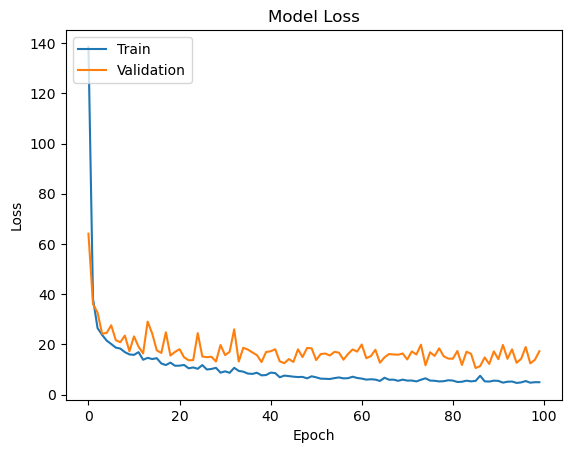

In [13]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
